In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
sns.set()

# Grab raw text data and convert it to a Pandas Dataframe
tmptr_df = pd.read_csv("data/GlobalLandTemperaturesByMajorCity.csv", parse_dates=True, infer_datetime_format = True)
tmptr_df['dt'] = pd.to_datetime(tmptr_df.dt)

In [11]:
DhakaTempdf = tmptr_df[tmptr_df.City == 'Dhaka'].dropna()
DhakaTempdf.set_index(DhakaTempdf.dt, inplace = True)
DhakaTempdf.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,,
2013-04-01,2013-04-01,29.012,0.366,Dhaka,Bangladesh,23.31N,90.00E
2013-05-01,2013-05-01,28.755,0.456,Dhaka,Bangladesh,23.31N,90.00E
2013-06-01,2013-06-01,30.133,0.509,Dhaka,Bangladesh,23.31N,90.00E
2013-07-01,2013-07-01,29.650,0.388,Dhaka,Bangladesh,23.31N,90.00E
2013-08-01,2013-08-01,29.154,0.502,Dhaka,Bangladesh,23.31N,90.00E


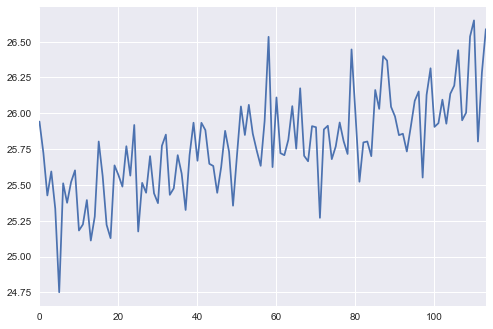

In [12]:
Dhaka_by_year_df = DhakaTempdf['1/1/1900':'8/1/2013'].resample('A').mean()
g = sns.tsplot(Dhaka_by_year_df.AverageTemperature)

There's a lot of volatility in the average temperature of Dhaka, Bangladesh over the last century. Still, the general trend is upwards in temperature. 

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,com=14.5).mean()
  """Entry point for launching an IPython kernel.


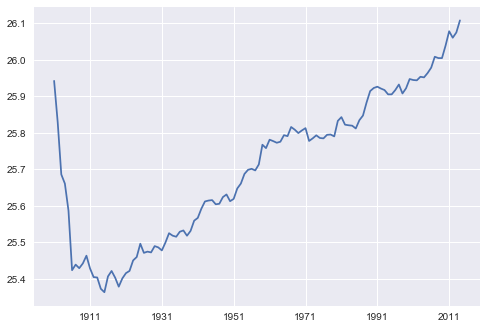

In [13]:
plot = plt.plot(Dhaka_by_year_df.index, pd.stats.moments.ewma(Dhaka_by_year_df.AverageTemperature, com = 14.5))

I'm not sure why the starting point of the curve is so high. It's possible that the data is muddy at that point, but it still stands that the average temperature has been increasing.  

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,com=9.5).mean()
  """Entry point for launching an IPython kernel.


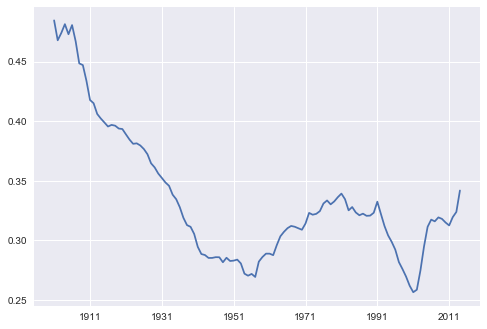

In [14]:
plot1 = plt.plot(Dhaka_by_year_df.index, pd.stats.moments.ewma(Dhaka_by_year_df.AverageTemperatureUncertainty, com = 9.5))

The plot of Average Temperature Uncertainty has a nice trend downward until about the middle of the century. I believe this spike has to do with industrialization in Dhaka. It goes down again until the turn of the century where I believe energy usage may have gone up due to increased economic production